In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import decomposition
from scipy.linalg import eigh

#load mnist data
mnist = pd.read_csv('mnist_train.csv')
print(mnist.shape)

#separate the data and labels
labels = mnist['label']
data = mnist.drop('label', axis=1)
print(labels.shape)
print(data.shape)

(42000, 785)
(42000,)
(42000, 784)


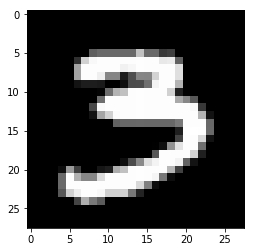

3


In [7]:
#print the images
idx=253
grid_data = data.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()
print(labels[idx])

In [8]:
#visualizing using pca
#standardizing the data - preprocessing
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\Users\SupriyaSecherla\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(42000, 784)


C:\Users\SupriyaSecherla\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
#find the covariance matrix of the standardized_data
#co-varianxe matrix = square symmetric matrix
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T, sample_data)
covar_matrix/=42000
print(covar_matrix.shape)

(784, 784)


In [14]:
#find the eigen values and eigen vectors of covariance matrix
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print(values)
print(vectors)
print(vectors.shape)

[29.11077253 40.69550978]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(784, 2)


In [16]:
#project the data onto the vectors
new_sample = np.matmul(sample_data, vectors)
print(new_sample.shape)

(42000, 2)


In [17]:
#append the labels to new_sample
new_sample = np.vstack((new_sample.T, labels)).T
print(new_sample.shape)

(42000, 3)


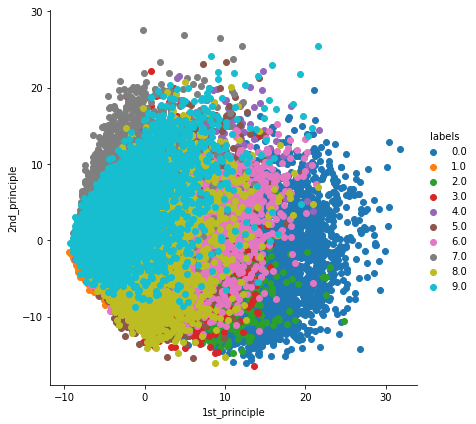

In [18]:
#add these data into a dataframe to plot 
dataframe = pd.DataFrame(data = new_sample, columns = ('2nd_principle', '1st_principle', 'labels'))
sb.FacetGrid(dataframe, hue = 'labels', height = 6).map(plt.scatter, '1st_principle', '2nd_principle').add_legend()
plt.show()

In [24]:
#pca using scikit learn
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print(pca_data.shape)

(42000, 2)


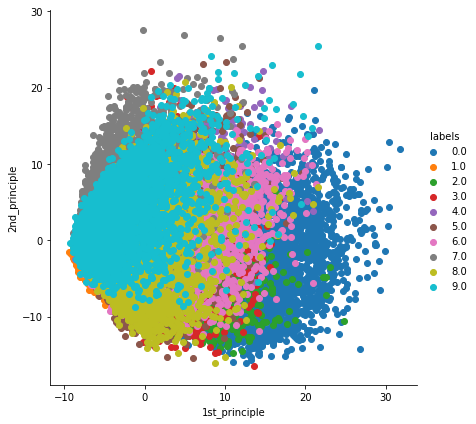

In [25]:
#append the labels to pca_data
pca_data = np.vstack((pca_data.T, labels)).T

#add these data into data frame to plot
pca_df = pd.DataFrame(data = pca_data, columns = ('1st_principle', '2nd_principle', 'labels'))

#plot the data
sb.FacetGrid(pca_df, hue = 'labels', height = 6).map(plt.scatter, '1st_principle', '2nd_principle').add_legend()
plt.show()

(42000, 784)


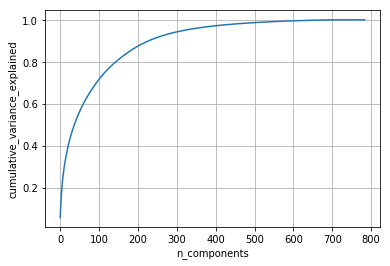

In [28]:
#pca for dimensionality reduction (not for visualization)
#using scikit learn
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
print(pca_data.shape)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
plt.grid()
plt.plot(cum_var_explained)
plt.xlabel('n_components')
plt.ylabel('cumulative_variance_explained')
plt.show()

(15000, 2)
(15000, 3)


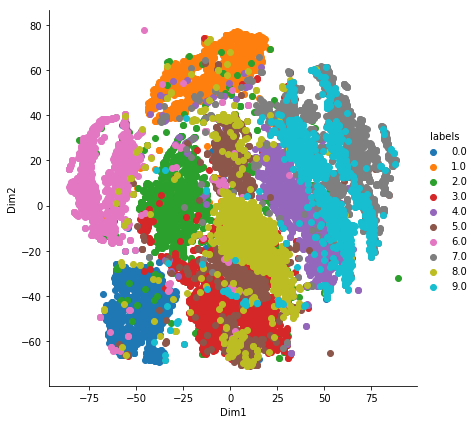

In [30]:
#dimensionality reduction using t-sne
#default perplexity = 30
#default number of iterations = 1000
from sklearn.manifold import TSNE
data_15000 = standardized_data[0:15000,:]
labels_15000 = labels[0:15000]
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(data_15000)
print(tsne_data.shape)
tsne_data = np.vstack((tsne_data.T, labels_15000)).T
print(tsne_data.shape)
tsne_df = pd.DataFrame(data = tsne_data, columns = ('Dim1', 'Dim2', 'labels'))
sb.FacetGrid(tsne_df, hue = 'labels', height = 6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

In [ ]:
#with perplexity = 50
model = TSNE(n_components = 2, random_state = 0, perplexity = 50)
tsne_data = model.fit_transform(data_15000)
tsne_data = np.vstack((tsne_data.T, labels_15000)).T
tsne_df = pd.DataFrame(data = tsne_data, colums = ('Dim1', 'Dim2', 'labels'))
sb.FacetGrid(tsne_df, hue = 'labels', height = 6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.title('with perplexity = 50')
plt.show()

In [ ]:
#with perplexity = 50, n_iterations = 5000
model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter = 5000)
tsne_data = model.fit_transform(data_15000)
tsne_data = np.vstack((tsne_data.T, labels_15000)).T
tsne_df = pd.DataFrame(data = tsne_data, colums = ('Dim1', 'Dim2', 'labels'))
sb.FacetGrid(tsne_df, hue = 'labels', height = 6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.title('with perplexity = 50, n_iterations = 5000')
plt.show()